<a href="https://colab.research.google.com/github/JeyyGit/machine-learning-tasks/blob/main/week_4/Data_Visualization_Diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Dataset/diamonds.csv'

df = pd.read_csv(file_path)

df.head()

Mounted at /content/drive


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
#
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

# Menampilkan jumlah nilai unik untuk setiap fitur
print("Jumlah unique value untuk masing-masing fitur:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Jumlah unique value untuk masing-masing fitur:
Unnamed: 0: 53940
carat: 273
cut: 5
color: 7
clarity: 8
depth: 184
table: 127
price: 11602
x: 554
y: 552
z: 375


1. Carat: Ini adalah ukuran berat berlian. Satu karat setara dengan 0,2 gram. Semakin besar karatnya, semakin berat dan biasanya semakin mahal pula berlian tersebut.

2. Cut: Ini mengacu pada cara berlian diukir dan diolah untuk memaksimalkan kilauan. Cut biasanya dikategorikan menjadi "Ideal", "Premium", "Good", "Very Good", dan "Fair".

3. Color: Ini merujuk pada warna berlian. Dalam skala GIA, warna dimulai dari huruf D (tanpa warna) hingga Z (berwarna kuning atau coklat muda).

4. Clarity: Ini menggambarkan seberapa bebas berlian dari inklusi dan cacat internal. Skala termasuk FL (Flawless), IF (Internally Flawless), VVS (Very Very Slightly Included), VS (Very Slightly Included), SI (Slightly Included), dan I (Included).

5. Depth: Ini adalah perbandingan persentase antara kedalaman total dan diameter terluar berlian.

6. Table: Ini adalah persentase lebar atas berlian terhadap titik terlebar berlian.

7. Price: Ini adalah harga berlian.

8. x, y, z: Ini adalah panjang, lebar, dan kedalaman berlian secara bergantian.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']
target_feature = ['price']

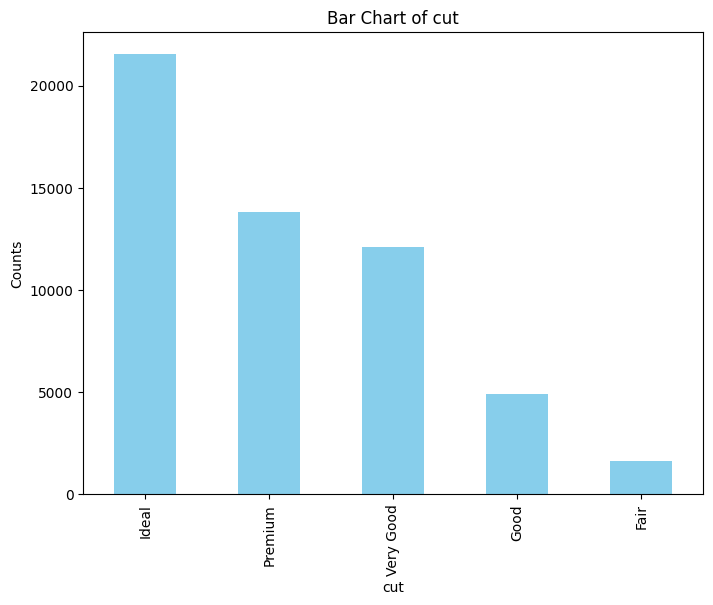

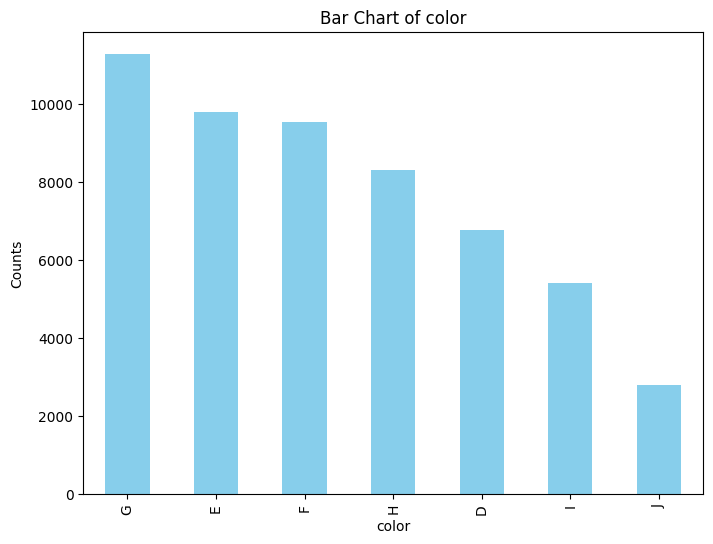

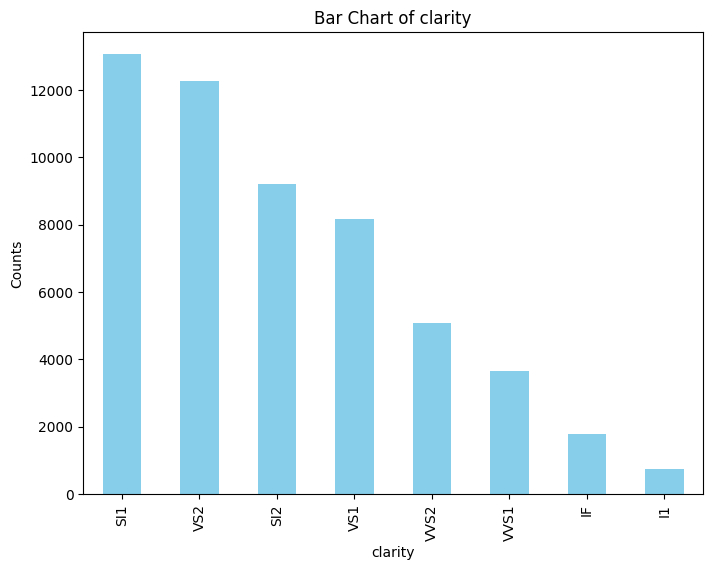

In [6]:
import matplotlib.pyplot as plt

# Membuat bar chart untuk setiap fitur kategorikal
for feature in categorical_features:
    data_counts = df[feature].value_counts()
    plt.figure(figsize=(8,6))
    data_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Bar Chart of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Counts')
    plt.show()

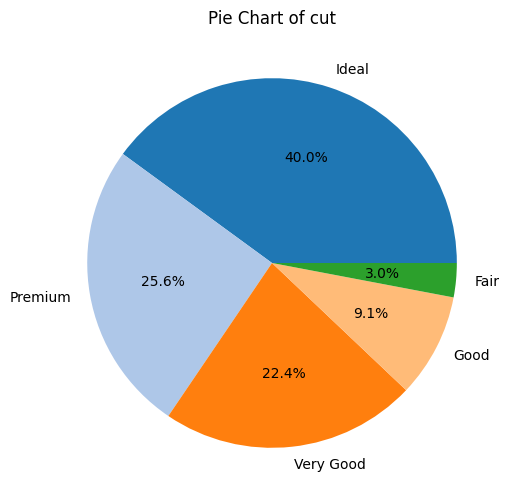

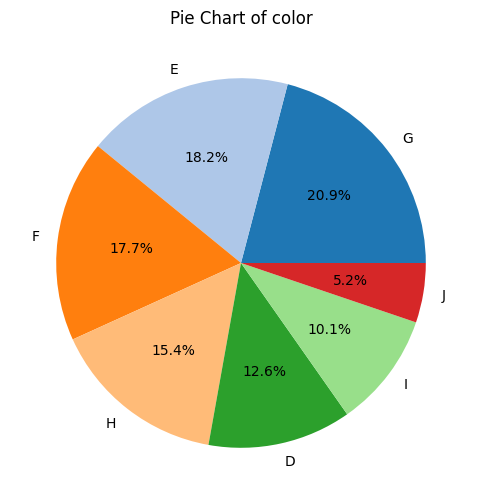

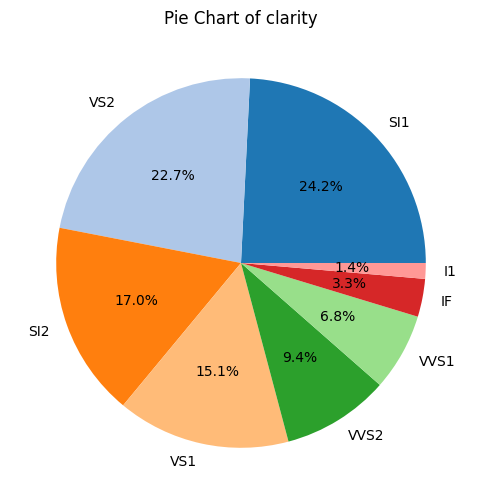

In [9]:
# Membuat pie chart untuk setiap fitur kategorikal
for feature in categorical_features:
    data_counts = df[feature].value_counts()
    plt.figure(figsize=(8,6))
    colors = plt.cm.tab20.colors
    plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', colors=colors)
    plt.title(f'Pie Chart of {feature}')
    plt.show()

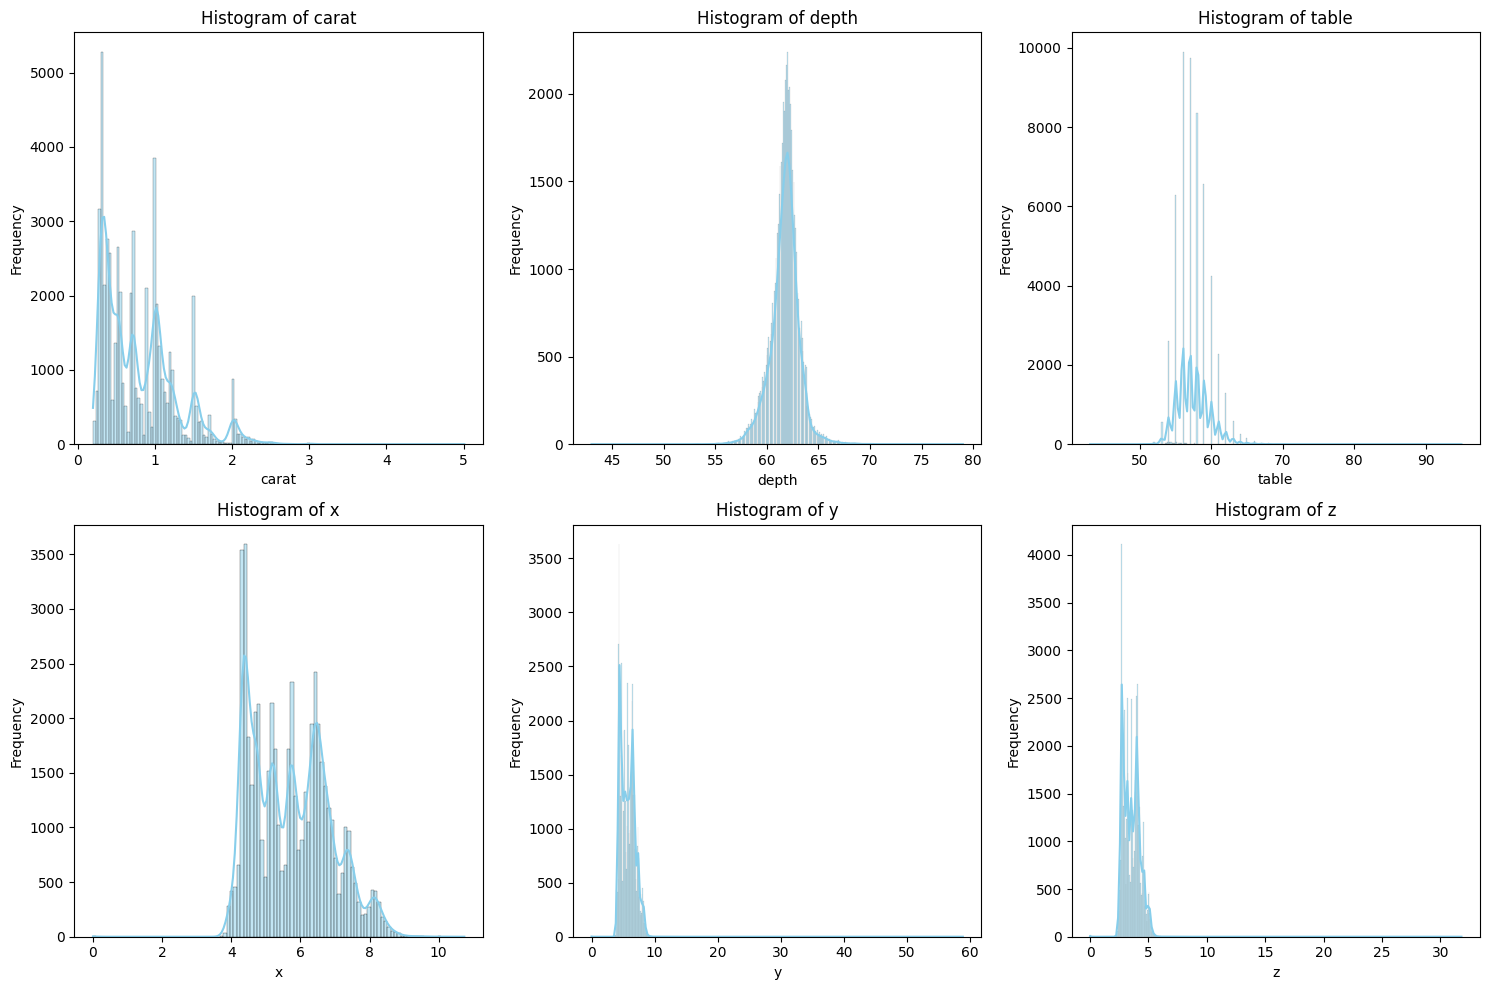

In [11]:
import seaborn as sns

# Menampilkan distribusi dalam 2 baris dan 3 kolom
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Fungsi untuk plot
def plot_histogram(feature, bin_width):
    plt.figure(figsize=(8,6))
    sns.histplot(df[feature], kde=True, bins=np.arange(min(df[feature]), max(df[feature]) + bin_width, bin_width), color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Menampilkan interaktif bin width
for feature in numerical_features:
    bin_slider = widgets.FloatSlider(min=0.1, max=1.0, step=0.1, value=0.5, description="Bin Width")
    interactive_plot = widgets.interactive(plot_histogram, feature=widgets.fixed(feature), bin_width=bin_slider)
    display(interactive_plot)

interactive(children=(FloatSlider(value=0.5, description='Bin Width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='Bin Width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='Bin Width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='Bin Width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='Bin Width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='Bin Width', max=1.0, min=0.1), Output()), _dom_class…

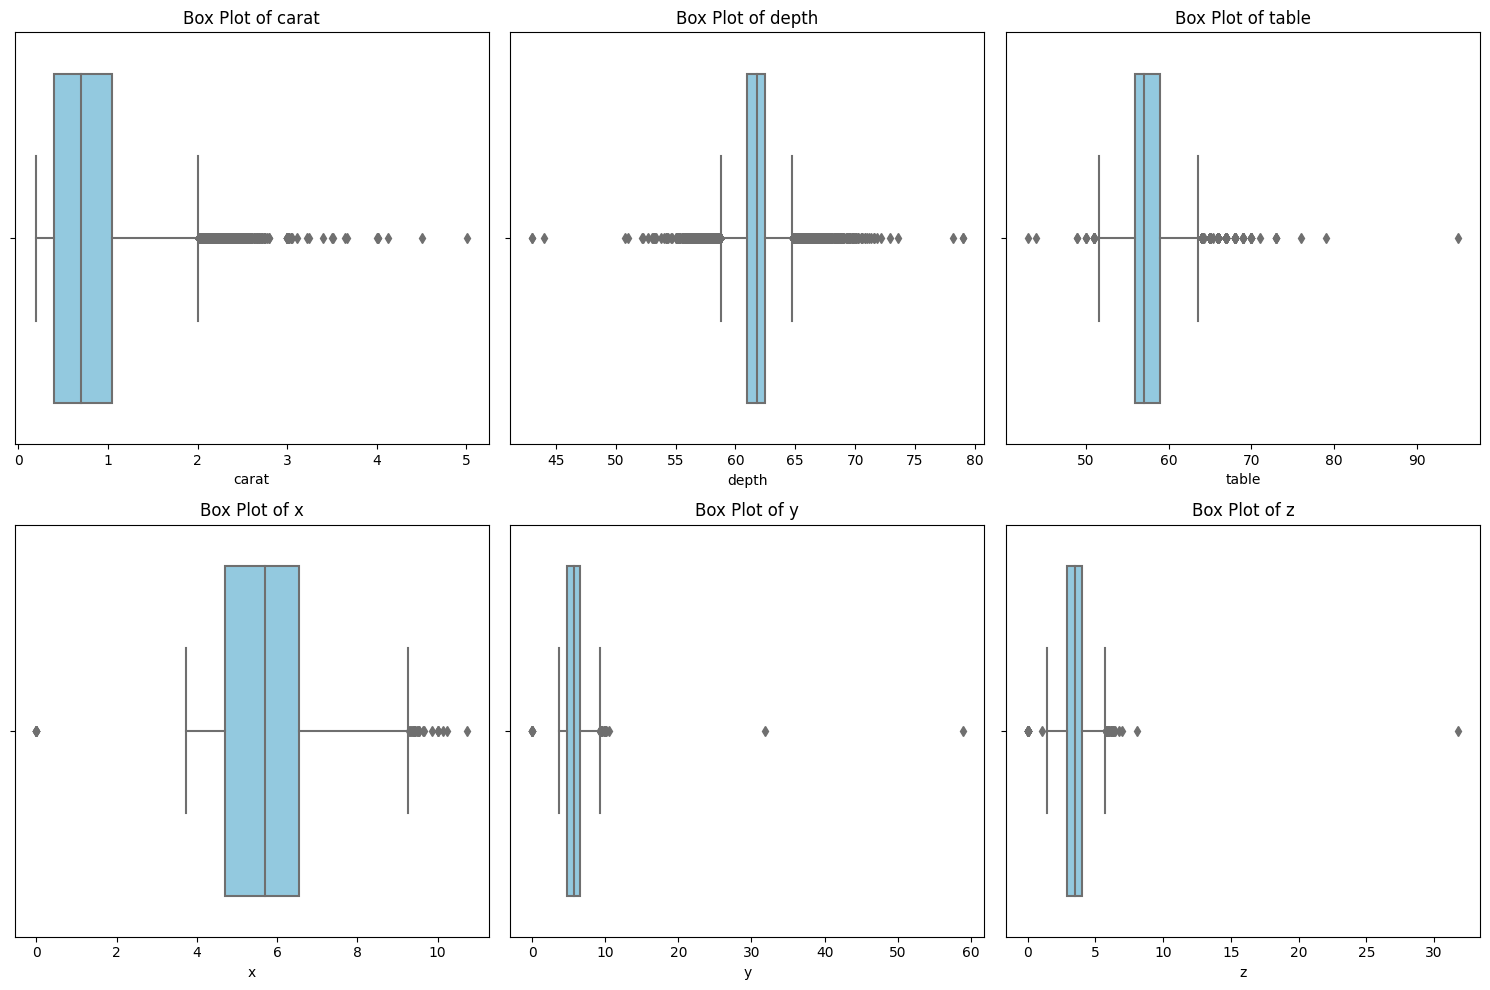

In [15]:
# Menampilkan box plot dalam 2 baris dan 3 kolom dengan orientasi horizontal
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel(feature)

plt.tight_layout()
plt.show()